# Questionnaire Analysis Notebook

The analysis of the four validated questionnaires used in the evaluation for VR application for selective mutism. The evaluation has been done by child psychologists. 

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
# load all the results in

df = pd.read_csv("SM VRET Evaluation Questionnaire.csv")
df

,Respondent,What is your age?,What is your gender?,What is your occupation?,"To what degree would you say you are familiar with utilizing technological devices? (Smartphones, PCs, Game Consoles, VR headsets, etc...)",Have you ever tried any VR technology before this demo?,"If the previous questions was ""Yes"", roughly how many times have you been in a virtual reality environment?",How much were you able to control events?,How responsive was the environment to actions that you initiated?,How natural did your interactions with the environment seem?,...,I experienced nausea.,I experienced difficulty concentrating.,I experienced fullness of head.,I experienced blurred vision.,I experienced dizzyness (eyes open).,I experienced dizzyness (eyes closed).,I experienced vertigo.,I experienced stomach awareness.,I experienced burping.,To what degree did this application met the expectations? (for clinicians affiliated with Levvel & UMC)
0,1,55-64,Female,psychologist,4,Yes,Oct-30,4,4,2,...,1,1,1,4,1,1,1,1,1,4
1,2,35-44,Male,psychologist,5,Yes,> 50,3,3,1,...,1,1,1,1,1,1,1,1,1,2
2,3,25-34,Female,Psychologist (I also treat with children with ...,4,Yes,< 5,3,3,3,...,1,2,2,2,1,1,1,1,1,3
3,4,55-64,Female,Psycholoog,2,Yes,< 5,4,5,4,...,1,1,1,1,1,1,1,1,1,4
4,5,25-34,Female,Psychologist/researcher,2,No,< 5,4,3,4,...,1,1,1,1,1,1,1,1,1,5


In [78]:
# df.columns

In [79]:
# divide up the questionnaires

df_basic = df.loc[:, 'Respondent':'If the previous questions was "Yes", roughly how many times have you been in a virtual reality environment?']
PQ = df.loc[:, 'How much were you able to control events?':'Were you involved in the experimental task to the extent that you lost track of time?']
ITQ = df.loc[:, 'How easily do become deeply involved in movies or TV shows? (skip if you do not watch movies or TV shows)':'To what degree do you ever become so involved in doing something that you lose all track of time?']
SUS = df.loc[:, 'I think that I would like to use this system frequently. ':'I needed to learn a lot of things before I could get going with this system.']
SSQ = df.loc[:, 'I experienced general discomfort.':'I experienced burping.']
Overview = df.loc[:, 'To what degree did this application met the expectations? (for clinicians affiliated with Levvel & UMC)'].to_frame()



In [80]:
# export the divided up questionnaires to CSV

# PQ = PQ.T
# PQ.to_csv('Presence Questionnaire.csv')

# ITQ = ITQ.T
# ITQ.to_csv("Immersive Tendency Questionnaire.csv")

# SUS = SUS.T
# SUS.to_csv("System Usability Scale.csv")

# SSQ = SSQ.T
# SSQ.to_csv("Simulator Sickness Questionnaire.csv")

In [81]:
# load in the edited CSVs and clean the other parts of the questionnaire 

PQ = pd.read_csv("Presence Questionnaire.csv")
ITQ = pd.read_csv("Immersive Tendency Questionnaire.csv")
SUS = pd.read_csv("System Usability Scale.csv")
SSQ = pd.read_csv("Simulator Sickness Questionnaire.csv")
basic = df_basic.drop(["Respondent"], axis=1).T
overview = df["To what degree did this application met the expectations? (for clinicians affiliated with Levvel & UMC)"].to_frame().T
overview = overview.reset_index().rename(columns={'index':'Questions'})

## Presence Questionnaire (PQ) Analysis 

In [82]:
# divide the presence questionnaire by its factors


# control factors
CFPQ = PQ[PQ['Factors'].str.contains('CF', na = False)]
# sensory factors
SFPQ = PQ[PQ['Factors'].str.contains('SF', na = False)]
# distraction factors
DFPQ = PQ[PQ['Factors'].str.contains('DF', na = False)]
# realism factors
RFPQ = PQ[PQ['Factors'].str.contains('RF', na = False)]

# divide the presence questionnaire by its subscales

# involvement/control
INVCPQ = PQ[PQ['Subscale'].str.contains('INV/C', na = False)]
# natural
NATRLPQ = PQ[PQ['Subscale'].str.contains('NATRL', na = False)]
# auditory
AUDPQ = PQ[PQ['Subscale'].str.contains('AUD', na = False)]
# resolution
RESOLPQ = PQ[PQ['Subscale'].str.contains('RESOL', na = False)]
# haptic
HAPTCPQ = PQ[PQ['Subscale'].str.contains('HAPTC', na = False)]
# interface quality
IFQUALPQ = PQ[PQ['Subscale'].str.contains('IFQUAL', na = False)]

IFQUALPQ





,Questions,Factors,Subscale,0,1,2,3,4
24,How much did the visual display quality interf...,DF,IFQUAL,4,3,2,1,3
25,How much did the control devices interfere wit...,"DF, CF",IFQUAL,1,2,3,3,3
26,How well could you concentrate on the assigned...,DF,IFQUAL,5,4,3,4,4


In [83]:
# PQ item score total

PQ_total = len(PQ.index) * 5
PQ_total

140

In [84]:
# total sum of the answers of the respondents in Presence Questionnaire

PQ_totalsum_R1 = PQ['0'].sum()
PQ_totalsum_R2 = PQ['1'].sum()
PQ_totalsum_R3 = PQ['2'].sum()
PQ_totalsum_R4 = PQ['3'].sum()
PQ_totalsum_R5 = PQ['4'].sum()

# mean of all the respondents in Presence Questionnaire

PQ_mean_R1 = PQ['0'].mean()
PQ_mean_R2 = PQ['1'].mean()
PQ_mean_R3 = PQ['2'].mean()
PQ_mean_R4 = PQ['3'].mean()
PQ_mean_R5 = PQ['4'].mean()




In [85]:
# all respondents mean and standard deviation according to PQ factors and subscales

# factors
controlFactor_mean = CFPQ.mean().mean()
sensoryFactor_mean = SFPQ.mean().mean()
distractionFactor_mean = DFPQ.mean().mean()
realismFactor_mean = RFPQ.mean().mean()

controlFactor_std = CFPQ.std().mean()
sensoryFactor_std = SFPQ.std().mean()
distractionFactor_std = DFPQ.std().mean()
realismFactor_std = RFPQ.std().mean()

# subscales
invcontrolSubscale_mean = INVCPQ.mean().mean()
naturalSubscale_mean = NATRLPQ.mean().mean()
auditorySubscale_mean = AUDPQ.mean().mean()
resolutionSubscale_mean = RESOLPQ.mean().mean()
hapticSubscale_mean = HAPTCPQ.mean().mean()
intqualSubscale_mean = IFQUALPQ.mean().mean()

invcontrolSubscale_std = INVCPQ.std().mean()
naturalSubscale_std = NATRLPQ.std().mean()
auditorySubscale_std = AUDPQ.std().mean()
resolutionSubscale_std = RESOLPQ.std().mean()
hapticSubscale_std = HAPTCPQ.std().mean()
intqualSubscale_std = IFQUALPQ.std().mean()


In [86]:
# make dataframe for the graph
PQ_graph_df = pd.DataFrame({
    'Subscales': ['INV/C', 'NAT', 'AUD', 'HAPTC', 'RES', 'IFQUAL'],
    'Mean': [invcontrolSubscale_mean, naturalSubscale_mean, auditorySubscale_mean, hapticSubscale_mean, resolutionSubscale_mean, 
             intqualSubscale_mean],
    'Standard Deviation': [invcontrolSubscale_std, naturalSubscale_std, naturalSubscale_std, hapticSubscale_std, resolutionSubscale_std,
                           intqualSubscale_std]
})

PQ_graph_df



,Subscales,Mean,Standard Deviation
0,INV/C,3.833333,0.873042
1,NAT,3.100000,0.707107
2,AUD,3.466667,0.707107
3,HAPTC,3.000000,NaN
4,RES,3.600000,NaN
5,IFQUAL,3.000000,1.152778


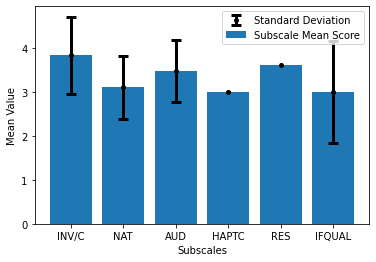

In [87]:
# plot the results (PQ)
plt.errorbar(PQ_graph_df['Subscales'], PQ_graph_df['Mean'], yerr = PQ_graph_df['Standard Deviation'], fmt='o', 
             color='Black', elinewidth=3,capthick=3,errorevery=1, alpha=1, ms=4, capsize = 5)
plt.bar(PQ_graph_df['Subscales'], PQ_graph_df['Mean'],tick_label = PQ_graph_df['Subscales'])##Bar plot
plt.xlabel('Subscales') ## Label on X axis
plt.ylabel('Mean Value') ##Label on Y axis
# plt.title('Mean and Standard Deviation Values of Presence Questionnaire Results by their Subscales')
plt.legend(['Standard Deviation', 'Subscale Mean Score'])
plt.show()


# note: might wana do this with subscales instead of factors for continuity with ITQ


In [88]:
PQabbLegend = pd.read_csv('PQ_abbLegend.csv')
PQabbLegend

print(PQabbLegend.to_latex(index=False))


\begin{tabular}{ll}
\toprule
Abbreviation &            Full Term \\
\midrule
       INV/C &  Involvement/Control \\
         NAT &              Natural \\
         AUD &             Auditory \\
       HAPTC &               Haptic \\
         RES &           Resolution \\
      IFQUAL &    Interface Quality \\
\bottomrule
\end{tabular}



In [89]:
# the grand total mean and std of presence questionnaire

PQ_mean_total = PQ.mean().mean()
STD_PQ = PQ.std().mean()

print("grand total mean is: ")
print(PQ_mean_total)
print("grand total standard deviation is: ")
print(STD_PQ)



grand total mean is: 
3.3928571428571423
grand total standard deviation is: 
1.1191950761851017


## Immersive Tendency Questionnaire (ITQ) Analysis

In [90]:


# divide the ITQ to its subscales



# Focus
FOCUSITQ = ITQ[ITQ['Subscales'].str.contains('FOCUS', na = False)]
# Involvement
INVOLITQ = ITQ[ITQ['Subscales'].str.contains('INVOL', na = False)]
# Games
GAMESITQ = ITQ[ITQ['Subscales'].str.contains('GAMES', na = False)]


# calculate mean and std of the subscales

# subscales
focusSubscale_mean = FOCUSITQ.mean().mean()
involSubscale_mean = INVOLITQ.mean().mean()
gamesSubscale_mean = GAMESITQ.mean().mean()

focusSubscale_std = FOCUSITQ.std().mean()
involSubscale_std = INVOLITQ.std().mean()
gamesSubscale_std = GAMESITQ.std().mean()







In [91]:
# make dataframe for the graph
ITQ_graph_df = pd.DataFrame({
    'Subscales': ['FOCUS', 'INVOL', 'GAMES'],
    'Mean': [focusSubscale_mean, involSubscale_mean, gamesSubscale_mean],
    'Standard Deviation': [focusSubscale_std, involSubscale_std, gamesSubscale_std]
})

ITQ_graph_df

,Subscales,Mean,Standard Deviation
0,FOCUS,3.900,0.564403
1,INVOL,3.275,0.992052
2,GAMES,2.000,0.000000


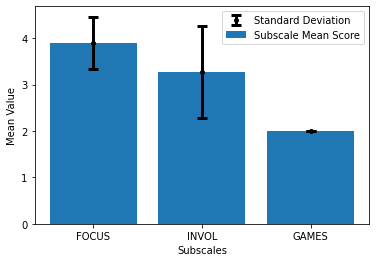

In [92]:
# plot the results (ITQ)
plt.errorbar(ITQ_graph_df['Subscales'], ITQ_graph_df['Mean'], yerr = ITQ_graph_df['Standard Deviation'], fmt='o', 
             color='Black', elinewidth=3,capthick=3,errorevery=1, alpha=1, ms=4, capsize = 5)

plt.bar(ITQ_graph_df['Subscales'], ITQ_graph_df['Mean'],tick_label = ITQ_graph_df['Subscales'])##Bar plot
plt.xlabel('Subscales') ## Label on X axis
plt.ylabel('Mean Value') ##Label on Y axis
# plt.title('Mean and Standard Deviation Values of Immersive Tendency Questionnaire Results by their Subscales')
plt.legend(['Standard Deviation', 'Subscale Mean Score'])

plt.show()

In [93]:
ITQabbLegend = pd.read_csv('ITQ_abbLegend.csv')

print(ITQabbLegend.to_latex())


\begin{tabular}{lll}
\toprule
{} & Abbreviation &                                         Full Term \\
\midrule
0 &        INVOL &         Tendency to become involved in activities \\
1 &        FOCUS &  Tendency to maintain focus on current activities \\
2 &        GAMES &                      Tendency to play video games \\
\bottomrule
\end{tabular}



In [94]:
# the grand total mean and std of ITQ

ITQ_mean_total = ITQ.mean().mean()
STD_ITQ = ITQ.std().mean()

print("grand total mean is: ")
print(ITQ_mean_total)
print("grand total standard deviation is: ")
print(STD_ITQ)

grand total mean is: 
3.5206932773109245
grand total standard deviation is: 
1.1288453586367762


## System Usability Scale (SUS) Analysis

In [95]:
SUS

,Questions,0,1,2,3,4
0,I think that I would like to use this system f...,5,5,3,5,3
1,I found the system unnecessarily complex.,2,1,1,1,2
2,I found the system easy to use.,3,5,4,5,4
3,I think that I would need the support of a tec...,4,1,2,2,4
4,I found the various functions in this system w...,4,4,3,4,4
5,I thought there was too much inconsistency in ...,3,4,3,2,4
6,I would imagine that the target group would le...,5,3,4,5,3
7,I found the system very cumbersome to use.,1,2,1,1,3
8,I felt very confident using the system.,4,4,3,4,3
9,I needed to learn a lot of things before I cou...,4,2,2,1,4


In [96]:
# To calculate the SUS score, first sum the score contributions from each item. Each item's 
# score contribution will range from 0 to 4. For items 1,3,5,7,and 9 the score contribution is the 
# scale position minus 1. For items 2,4,6,8 and 10, the contribution is 5 minus the scale position. 
# Multiply the sum of the scores by 2.5 to obtain the overall value of SU.  
 
# SUS scores have a range of 0 to 100.

# 0,2,4,6,8 = score position - 1
# 1,3,5,7,9 = 5 - score position




In [97]:
# do the SUS score calculation
x = SUS.iloc[[0,2,4,6,8]]
x.loc[:, '0':'4'] = x.loc[:, '0':'4'] - 1

y = SUS.iloc[[1,3,5,7,9]]
y.loc[:, '0':'4'] = 5 - y.loc[:, '0':'4']


SUS_updated = pd.concat([x, y], ignore_index=True)

finalScore = SUS_updated.loc[:, '0':'4'].sum() * 2.5

C:\Users\emreo\anaconda3\lib\site-packages\pandas\core\indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [98]:
# calculate mean and std of the finalScore
print('The mean of the SUS Score is: ')
print(finalScore.mean())
print('The standard deviation of the SUS score is: ')
print(finalScore.std())

The mean of the SUS Score is: 
71.0
The standard deviation of the SUS score is: 
14.641550464346322


## Simulator Sickness Questionnaire (SSQ) Analysis

In [99]:
SSQ

,Questions,Subscales,0,1,2,3,4
0,I experienced general discomfort.,"Nausea, Oculomotor",2,1,3,1,2
1,I experienced fatigue.,Oculomotor,1,1,2,1,2
2,I experienced headache.,Oculomotor,1,1,1,1,3
3,I experienced eye strain.,Oculomotor,1,1,3,1,3
4,I experienced difficulty focusing.,"Oculomotor, Disorientation",4,1,2,1,2
5,I experienced increased salivation.,Nausea,1,1,1,1,1
6,I experienced sweating.,Nausea,1,1,1,1,1
7,I experienced nausea.,"Nausea, Disorientation",1,1,1,1,1
8,I experienced difficulty concentrating.,"Nausea, Oculomotor",1,1,2,1,1
9,I experienced fullness of head.,Disorientation,1,1,2,1,1


In [105]:
# take 1 off every value to have 0 as a number

SSQ.loc[:, '0':'4'] = SSQ.loc[:, '0':'4'] - 1
SSQ





,Questions,Subscales,0,1,2,3,4
0,I experienced general discomfort.,"Nausea, Oculomotor",1,0,2,0,1
1,I experienced fatigue.,Oculomotor,0,0,1,0,1
2,I experienced headache.,Oculomotor,0,0,0,0,2
3,I experienced eye strain.,Oculomotor,0,0,2,0,2
4,I experienced difficulty focusing.,"Oculomotor, Disorientation",3,0,1,0,1
5,I experienced increased salivation.,Nausea,0,0,0,0,0
6,I experienced sweating.,Nausea,0,0,0,0,0
7,I experienced nausea.,"Nausea, Disorientation",0,0,0,0,0
8,I experienced difficulty concentrating.,"Nausea, Oculomotor",0,0,1,0,0
9,I experienced fullness of head.,Disorientation,0,0,1,0,0


In [66]:

N = SSQ[SSQ['Subscales'].str.contains('Nausea', na = False)]
O = SSQ[SSQ['Subscales'].str.contains('Oculomotor', na = False)]
D = SSQ[SSQ['Subscales'].str.contains('Disorientation', na = False)]

nVal = 9.54
oVal = 7.58
dVal = 13.92
tsVal = 3.74

nSum = N.loc[:, '0':'4'].sum()
oSum = O.loc[:, '0':'4'].sum()
dSum = D.loc[:, '0':'4'].sum()

totalN = nSum * nVal
totalO = oSum * oVal
totalD = dSum * dVal

TS = (nSum + oSum + dSum) * tsVal

nSum

0    1
1    0
2    3
3    0
4    1
dtype: int64

In [106]:
print('Nausea mean SSQ score is: ')
print(totalN.mean())
print('Oculomotor mean SSQ score is: ')
print(totalO.mean())
print('Disorientation mean SSQ score is: ')
print(totalD.mean())




print('Total mean SSQ score is: ')


print(TS.mean())

Nausea mean SSQ score is: 
9.54
Oculomotor mean SSQ score is: 
33.352
Disorientation mean SSQ score is: 
27.839999999999996
Total mean SSQ score is: 
27.676
